In [1]:

import numpy as np
import math
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.circuit.library import MCMT
from qiskit import QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
string = str(input()) #this is for amino acid encoding string
pattern = str(input())
string_len = len(string)
index = int(math.log(string_len,2))
print(index)

 11011001
 1011


3


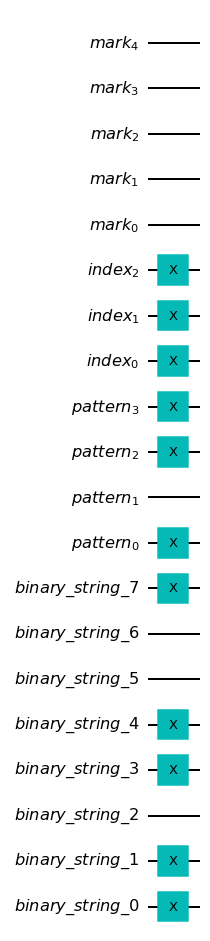

In [3]:

#this is for pattern segment
#def check_one(a):
 #   for i in a:
  #      if(a[i]==1):
            
#mapp_string = list(map(list, int(string)))
#mapp_pattern = list(map(list, int(pattern)))
qr1 = QuantumRegister(len(string), 'binary_string') #this is binary string of lengths N, here N=8
qr2 = QuantumRegister(len(pattern), 'pattern') #this is for binary string of lengths M, for proof M=4
qr3 = QuantumRegister(index, 'index') 
qr4 = QuantumRegister(len(pattern)+1, 'mark')

#qc = QuantumCircuit(qr1, qr2, qr3)
qc = QuantumCircuit(qr1, qr2,qr3, qr4)
#initial_state  = [1,0]
qc.x(qr3[0:index])
#qc.h(qr2[0:len(pattern)])
qc.draw()
for i in range(len(string)):
    if (string[i]=='1'):
        qc.x(qr1[i])
   # qc.x(qr1[i])
for j in range(len(pattern)):
    if (pattern[j]=='1'):
        qc.x(qr2[j])
    #qc.x(qr2[i])
#for i in range(0,33):
    #qc.initialize(initial_state, qr1[i])
#qc.initialize(initial_state, qc1.qubits)
qc.draw(reverse_bits=True)

In [4]:
qc.barrier()



In [5]:
#in this section I am planning to mark pattern 1011
# hence I am planning to expand this paper for 4 qubit
# https://arxiv.org/pdf/1703.10535.pdf
qc.x(qr4[len(pattern)])
qc.h(qr4[0:len(pattern)+1])
qc.draw()
qc.barrier()


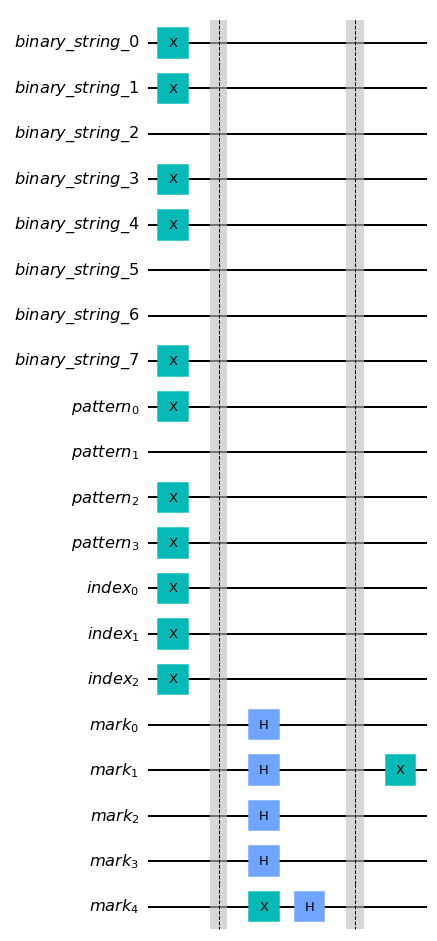

In [6]:
# to mark- that means to apply- grover algorithm
# I followed boolean oracle described in the previous paper
for j in range(len(pattern)):
    if (pattern[j]=='0'):
        qc.x(qr4[j])
qc.draw()


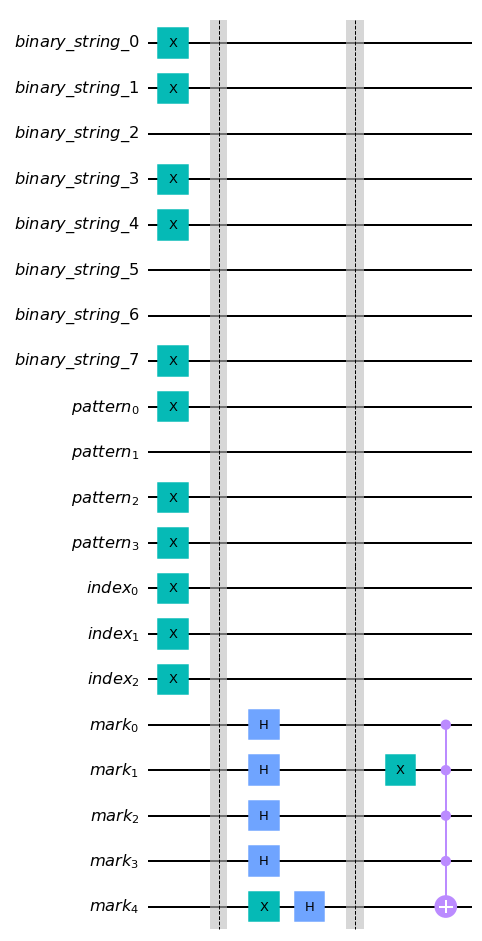

In [7]:
# applied mct gate for the grover algorithm
qc.mct(qr4[0:4], qr4[4])
qc.draw()

In [8]:
for j in range(len(pattern)):
    if (pattern[j]=='0'):
        qc.x(qr4[j])
qc.draw()
qc.barrier()

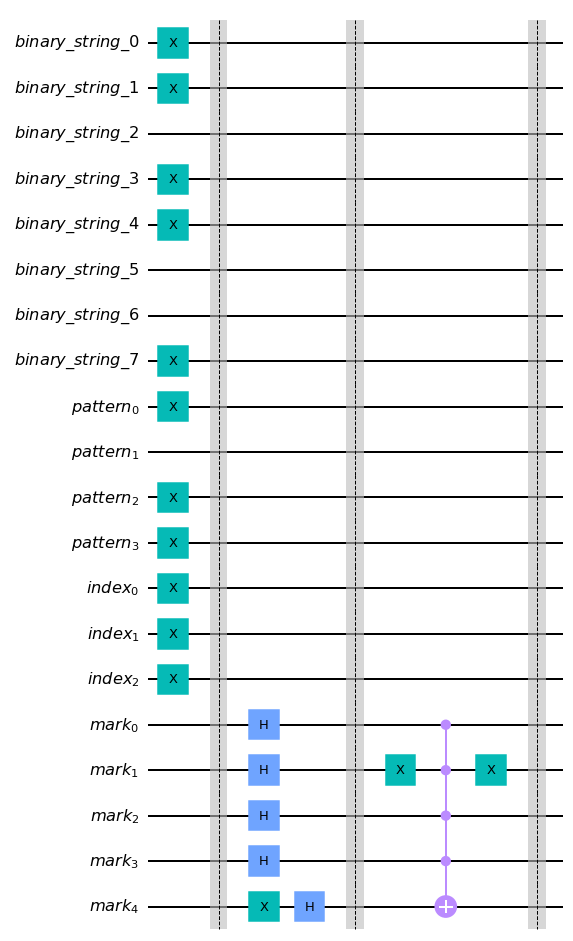

In [9]:
qc.draw()

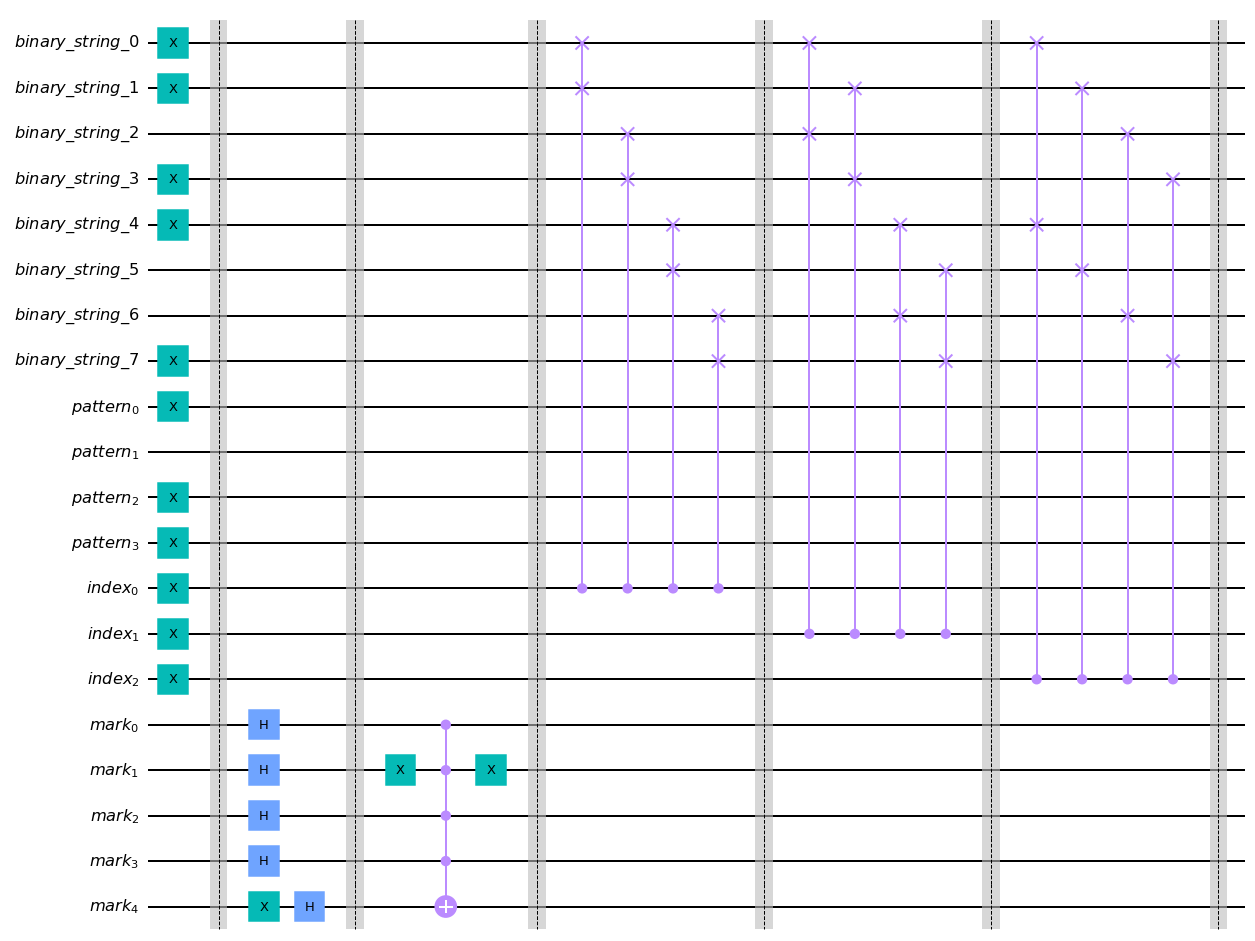

In [10]:
# cyclic shift operator been checked here
# swapping for 2**0 bit position 
# that means 1 bit
for i in range(index):
    if i==0:
        qc.cswap(qr3[i], qr1[0], qr1[1])
        qc.cswap(qr3[i], qr1[2], qr1[3])
        qc.cswap(qr3[i], qr1[4], qr1[5])
        qc.cswap(qr3[i], qr1[6], qr1[7])
        qc.barrier()
    if i==1:
        qc.cswap(qr3[i], qr1[0], qr1[2])
        qc.cswap(qr3[i], qr1[1], qr1[3])
        qc.cswap(qr3[i], qr1[4], qr1[6])
        qc.cswap(qr3[i], qr1[5], qr1[7])
        qc.barrier()
    if i==2:
        qc.cswap(qr3[i], qr1[0], qr1[4])
        qc.cswap(qr3[i], qr1[1], qr1[5])
        qc.cswap(qr3[i], qr1[2], qr1[6])
        qc.cswap(qr3[i], qr1[3], qr1[7])
        qc.barrier()

qc.draw()

<ipython-input-11-7575c0a36229>:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(pi/4, qr4[0], qr4[3])


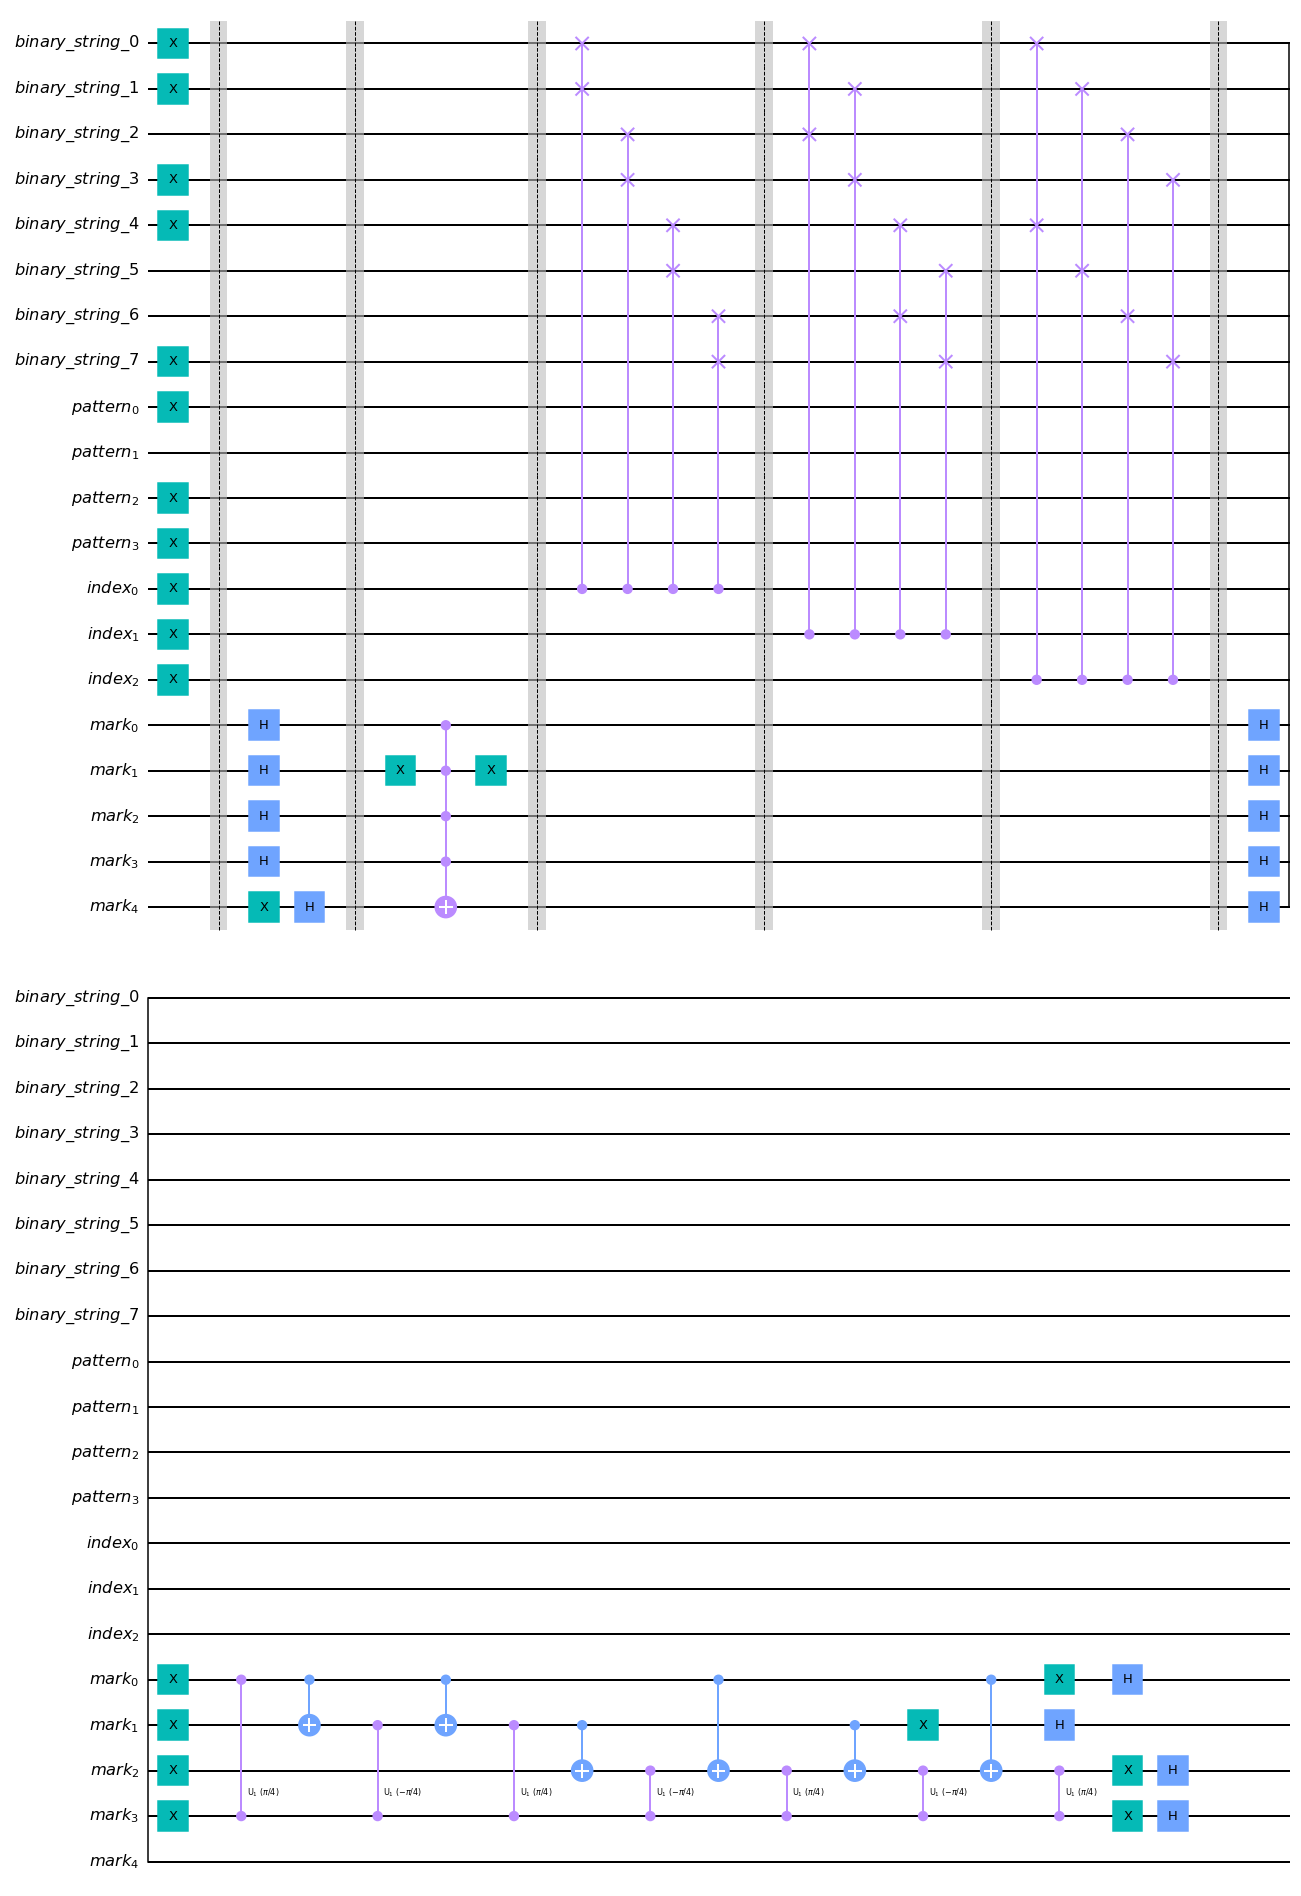

In [11]:
from math import pi
qc.h(qr4[0:len(pattern)+1])
qc.x(qr4[0:len(pattern)])

qc.cu1(pi/4, qr4[0], qr4[3])
qc.cx(qr4[0], qr4[1])
qc.cu1(-pi/4, qr4[1], qr4[3])
qc.cx(qr4[0], qr4[1])
qc.cu1(pi/4, qr4[1], qr4[3])
qc.cx(qr4[1], qr4[2])
qc.cu1(-pi/4, qr4[2], qr4[3])
qc.cx(qr4[0], qr4[2])
qc.cu1(pi/4, qr4[2], qr4[3])
qc.cx(qr4[1], qr4[2])
qc.cu1(-pi/4, qr4[2], qr4[3])
qc.cx(qr4[0], qr4[2])
qc.cu1(pi/4, qr4[2], qr4[3])

qc.x(qr4[0:len(pattern)])
qc.h(qr4[0:len(pattern)])
qc.draw()


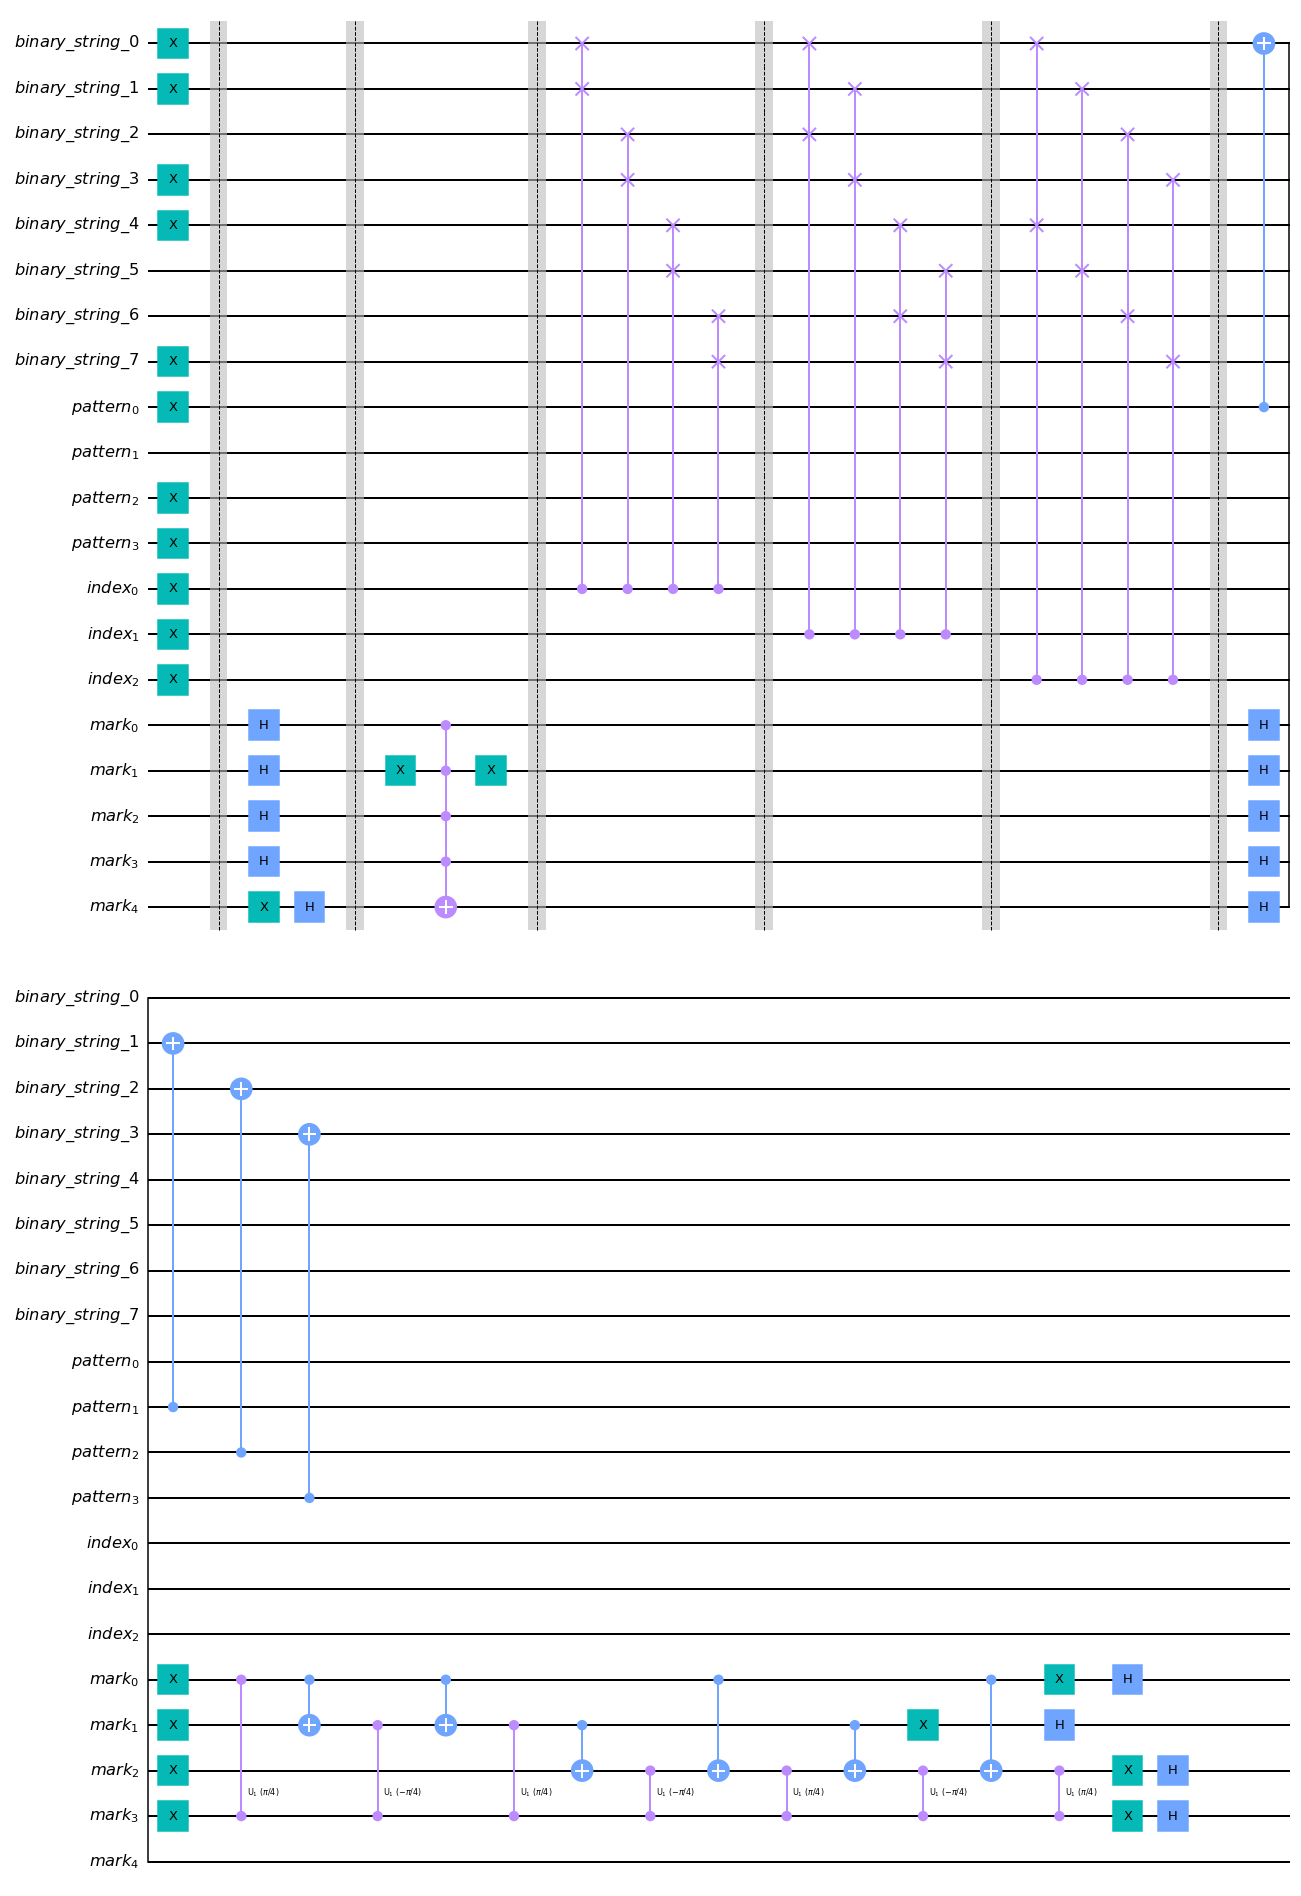

In [12]:
for i in range(len(pattern)):
    qc.cx(qr2[i], qr1[i])

qc.draw()

<ipython-input-13-8d311932830b>:10: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = qc + meas
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


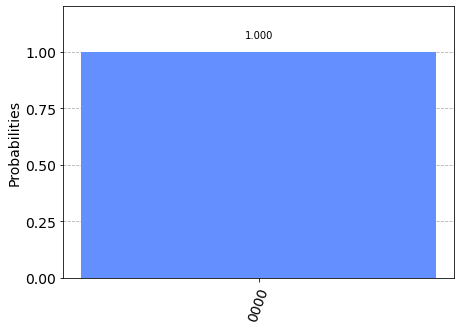

In [13]:
# Create a Quantum Circuit
from qiskit import *
meas = QuantumCircuit(4, 4)
meas.barrier(range(4))
# map the quantum measurement to the classical bits
meas.measure(range(4), range(4))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = qc + meas

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

